In [1]:
from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config
from madigan.environments.cpp import HDFSource, DataSourceTick
from madigan.utils.data import State

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config_trend_ou = make_config("TrendOU", assets=["trendOU1"],
                        data_source_type="TrendOU",
                        data_source_config=dict(
                            trend_prob=[.001],
                            noise_trend = [.001],
                            min_period=[100],
                            max_period=[200],
                            dYMin = [0.005],
                            dYMax = [0.01],
                            start = [5.0],
                            theta = [0.15],
                            phi = [.0],
                            ema_alpha = [0.3])
                        )
env_trend_ou = make_env(config_trend_ou)

In [3]:
config_hdf = make_config("HDF", assets=["audnzd"],
                        data_source_type="HDFSource",
                        data_source_config=dict(filepath="/media/hemu/Data/Markets/FX/working_data_aud_nzd.h5",
                                                main_key="aud_nzd/10min",
                                                price_key="midprice",
                                                timestamp_key="timestamp",
                                                )
                        )
env_hdf = make_env(config_hdf)

In [4]:
hdfpath = ("/media/hemu/Data/Markets/FX/working_data_aud_nzd.h5")
main_key = 'aud_nzd/10min'
price_key = 'midprice'
timestamp_key = 'timestamp'
datasource = HDFSource(str(hdfpath), main_key, price_key, timestamp_key)
datasource.getData()

array([1.28655])

In [5]:
class PyDataSource(HDFSource):
    def getData(self):
        return super().getData()
    
pysource = PyDataSource(str(hdfpath), main_key, price_key, timestamp_key)
pysource.getData()

array([1.28655])

In [6]:
datasource.getData()
print(pysource.currentPrices(), datasource.currentPrices())
print(pysource.nAssets, datasource.nAssets)
print(pysource.currentTime, datasource.currentTime)

[1.28655] [1.28633]
548381424 0
1241136000000000000 1241136300000000000


In [7]:
print(env_hdf.dataSource)
env_hdf.setDataSource(pysource) # TAKES OWNERSHIP
# env_hdf.setDataSource()
# del pysource # MUST STAY ALIVE
print(env_hdf.dataSource)
print(env_hdf.step())

(<madigan.environments.cpp.build.env.State object at 0x7f041cbe8830>, 0.0, False, <madigan.environments.cpp.build.env.EnvInfoSingle object at 0x7f041d2755b0>)


In [8]:
window_trend_ou = StackerDiscrete(1280)
window_hdf = StackerDiscrete(1280)


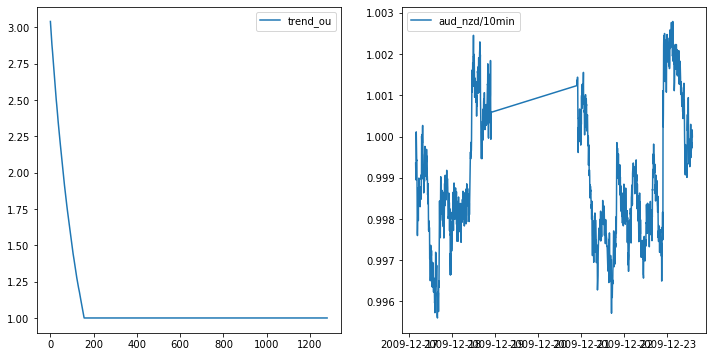

In [44]:
window_trend_ou.reset_state()
window_trend_ou.initialize_history(env_trend_ou)
window_hdf = StackerDiscrete(1280)
window_hdf.initialize_history(env_hdf)
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].plot(window_trend_ou.current_data().price, label='trend_ou')
ax[1].plot(pd.to_datetime(window_hdf.current_data().timestamp), window_hdf.current_data().price, label=main_key)
ax[0].legend()
ax[1].legend()

In [13]:
window_hdf.current_data()

State(price=array([[1.01469004],
       [1.01551803],
       [1.01528033],
       ...,
       [1.00054275],
       [1.00074084],
       [1.        ]]), portfolio=array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]]), timestamp=array([1242810300000000000, 1242810600000000000, 1242810900000000000, ...,
       1243456200000000000, 1243456500000000000, 1243456800000000000]))